# K-Nearest Neighbors     

In [29]:
%load_ext autoreload
%autoreload 2
 
%matplotlib inline
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import time
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
df = pd.read_csv('./Datasets/clean_train.csv')
df_test = pd.read_csv('./Datasets/clean_test.csv')

In [32]:
df.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,date_recordedIs_month_start_False,date_recordedIs_month_start_True,date_recordedIs_quarter_end_False,date_recordedIs_quarter_end_True,date_recordedIs_quarter_start_False,date_recordedIs_quarter_start_True,date_recordedIs_year_end_False,date_recordedIs_year_start_False,date_recordedIs_year_start_True,status_group
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,1,0,1,0,1,0,1,1,0,functional
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,...,1,0,1,0,1,0,1,1,0,functional
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,1,0,1,0,1,0,1,1,0,functional
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,1,0,1,0,1,0,1,1,0,non functional
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,...,1,0,1,0,1,0,1,1,0,functional


In [33]:
df['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [34]:
df_test.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,date_recordedIs_month_end_False,date_recordedIs_month_end_True,date_recordedIs_month_start_False,date_recordedIs_month_start_True,date_recordedIs_quarter_end_False,date_recordedIs_quarter_end_True,date_recordedIs_quarter_start_False,date_recordedIs_quarter_start_True,date_recordedIs_year_end_False,date_recordedIs_year_start_False
0,50785,0.0,1996,35.290799,-4.059696,0,21,3,321,2012,...,1,0,1,0,1,0,1,0,1,1
1,51630,0.0,1569,36.656709,-3.309214,0,2,2,300,2000,...,1,0,1,0,1,0,1,0,1,1
2,17168,0.0,1567,34.767863,-5.004344,0,13,2,500,2010,...,1,0,0,1,1,0,1,0,1,1
3,45559,0.0,267,38.058046,-9.418672,0,80,43,250,1987,...,1,0,1,0,1,0,1,0,1,1
4,49871,500.0,1260,35.006123,-10.950412,0,10,3,60,2000,...,1,0,1,0,1,0,1,0,1,1


In [35]:
df.shape, df_test.shape

((59400, 201), (14850, 197))

In [36]:
# train and test are different shapes. Find which columns are different.
df.columns.difference(df_test.columns)

Index(['date_recordedIs_year_start_True',
       'extraction_type_other - mkulima/shinyanga', 'scheme_management_None',
       'status_group'],
      dtype='object')

In [37]:
df_test.columns.difference(df.columns)

Index([], dtype='object')

In [38]:
# Drop columns that are different excluding the target(status_group)
df.drop(columns = ['date_recordedIs_year_start_True',
                   'extraction_type_other - mkulima/shinyanga', 
                   'scheme_management_None'], inplace=True)

In [39]:
df.shape, df_test.shape

((59400, 198), (14850, 197))

# Modeling

### Feature Set

In [40]:
X = df.drop(columns = ['id', 'status_group']).values
y = df['status_group'].values

### Normalize the Data

In [41]:
X = preprocessing.StandardScaler().fit(X).transform(X)

### Train-Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [43]:
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (44550, 196) (44550,)
Testing set:  (14850, 196) (14850,)


### Training the Model
Starting the algorithm with k=4 neighbors at first.

In [44]:
k = 4
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

### Predicting

In [45]:
yhat = knn.predict(X_test)

### Accuracy Evaluation
Using __accuracy classification score__ to compute subset accuracy. This function is equal to the Jaccard similarity score function. This computes how closely the actual labels and the predicted labels matched in the train set.

In [46]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8427384960718294
Test set Accuracy:  0.7686195286195286


### Which K is most accurate?
Examining what number of K nearest neighbors is the most accurate number to use.

In [54]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    # Train model and Predict
    knn_ = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat_ = knn_.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_)
    
    std_acc[n-1] = np.std(yhat_==y_test)/np.sqrt(yhat_.shape[0])

In [55]:
mean_acc

array([0.75063973, 0.76282828, 0.76808081, 0.76861953, 0.76606061,
       0.76511785, 0.7647138 , 0.76451178, 0.76397306])

### Plotting the accuracy for different number of neighbors

<IPython.core.display.Javascript object>


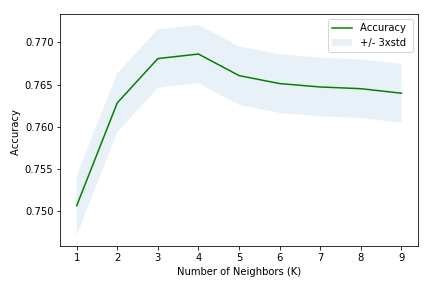

In [56]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [57]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7686195286195286 with k= 4


It just so happens 4 neighbors was the most accurate. That was just a lucky guess.

### Confusion Matrix

In [20]:
# Create a confusion matrix for K=1 model.
print(classification_report(y_test, yhat))
pd.DataFrame(confusion_matrix(y_test, yhat), 
             columns=['Pred +', 'Pred Fix', 'Pred -'], 
             index=['Act +', 'Pred Fix', 'Act -'])

                         precision    recall  f1-score   support

             functional       0.76      0.89      0.82      8071
functional needs repair       0.46      0.27      0.34      1089
         non functional       0.83      0.69      0.75      5690

              micro avg       0.77      0.77      0.77     14850
              macro avg       0.68      0.62      0.64     14850
           weighted avg       0.76      0.77      0.76     14850



,Pred +,Pred Fix,Pred -
Act +,7220,192,659
Pred Fix,638,295,156
Act -,1642,149,3899


### Create prediction on test data and create dataframe for competition submission.

In [21]:
X2 = df_test.drop(columns = ['id']).values

In [22]:
yhat2 = knn.predict(X2)

In [23]:
preds = pd.DataFrame(yhat2)

In [24]:
preds.head()

,0
0,functional
1,functional
2,functional
3,functional
4,functional


In [25]:
df_test.shape, preds.shape

((14850, 197), (14850, 1))

In [26]:
predict = pd.concat((df_test['id'], preds), axis=1)

In [27]:
predict.columns=['id', 'status_group']

In [28]:
predict['status_group'].unique()

array(['functional', 'functional needs repair', 'non functional'],
      dtype=object)

In [29]:
predict.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


In [30]:
predict.to_csv('./Submissions/Submission_1.csv', index=False)